
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Andrés Riveros Neira

**Rol**: 201710505-4

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets,preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [118]:
digits.describe(include='all')

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [123]:
digits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

In [128]:
int(digits.describe(include='all').iloc[0,0])

1797

¿Cómo se distribuyen los datos?

__R__: el conjunto de datos consta de 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (target) con el nombre target.

¿Cuánta memoria estoy utilizando?, ¿Qué tipo de datos son?

__R__: A partir de lo mostrado anteriormente se tiene que los datos ocupan 456.4 KB de memoria y el tipo de dato es int32

¿Cuántos registros por clase hay?, ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

__R__: Existen 1797 registros por cada clase y no hay datos de tipo Nan, es decir, los datos corresponden a lo esperado.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [6]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

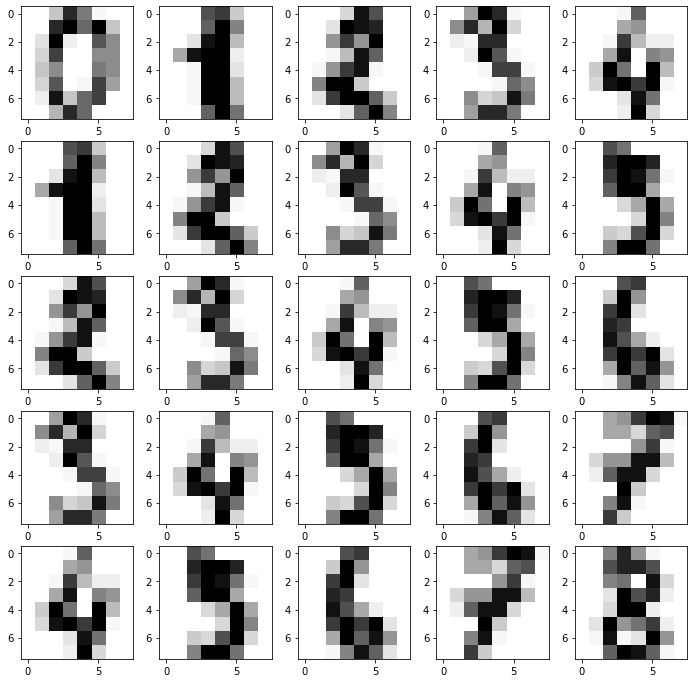

In [8]:
#Visualizacion de imagenes
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for j in range(5):
    for i in range(5):                      
        axs[i,j].imshow(digits_dict["images"][i+j],cmap='Greys')

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `sklearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [7]:
X = digits.drop(columns="target").values
y = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  1797
numero de filas train set     :  1437
numero de filas test set      :  360


In [129]:
from time import time

### Regresión logistica

In [8]:
from sklearn.linear_model import LogisticRegression

rlog =LogisticRegression()
rlog.fit(X_train, y_train)

c:\users\shada\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
from sklearn.model_selection import GridSearchCV,cross_val_score
param_grid = {'C':[1, 2,3,4,5,7,8,9,10],'max_iter':[100,110,130],'penalty':['l1', 'l2', 'elasticnet', 'none']} #parametros a alterar

In [130]:
tgs_in=time()
gs = GridSearchCV(estimator=rlog, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
tgs_fin=time()

c:\users\shada\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [262]:
print('mejor score:')
print(gs.best_score_)
print()
print('mejores parametros:')
print(gs.best_params_)

mejor score:
0.954757065427797

mejores parametros:
{'C': 1, 'max_iter': 110, 'penalty': 'l2'}


In [137]:
print('Tiempo de ejecución rlog:\n')
print(tgs_fin-tgs_in)

Tiempo de ejecución rlog:

56.1012008190155


In [138]:
rlog_better = gs.best_estimator_
rlog_better.fit(X_train, y_train) #rlog mejorado
print('Precisión: {0:.3f}'.format(rlog_better.score(X_test, y_test)))

Precisión: 0.975


c:\users\shada\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(y_test)
y_pred = list(rlog_better.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas rlog:")
print("")
print(df_metrics)


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]

Metricas rlog:

   accuracy  recall  precision  fscore
0     0.975  0.9765     0.9767  0.9765


In [16]:
rlog.get_params() #parametros rlog

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### K-Nearest Neighbours

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
knn.get_params() 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [139]:
param_grid_1 = {'n_neighbors':[1, 2,3,4,5,7,8,9,10],'p':[1,2,3,4,5]}
tgs1_in=time()
gs_1 = GridSearchCV(estimator=knn, 
                  param_grid=param_grid_1, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs_1 = gs_1.fit(X_train, y_train)
tgs1_fin=time()

In [263]:
print('mejor score:')
print(gs_1.best_score_)
print()
print('mejores parametros:')
print(gs_1.best_params_)

mejor score:
0.9867789392179637

mejores parametros:
{'n_neighbors': 3, 'p': 3}


In [28]:
knn_better = gs_1.best_estimator_
knn_better.fit(X_train, y_train)  #knn mejorado
print('Precisión: {0:.3f}'.format(knn_better.score(X_test, y_test)))

Precisión: 0.983


In [141]:
print('Tiempo de ejecución knn:\n')
print(tgs1_fin-tgs1_in)

Tiempo de ejecución knn:

41.126413106918335


In [29]:
from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true =  list(y_test)
y_pred = list(knn_better.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas knn:")
print("")
print(df_metrics)


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  1  1  0  0  0 37]]

Metricas knn:

   accuracy  recall  precision  fscore
0    0.9833  0.9841      0.984  0.9839


### SVC

In [59]:
from sklearn import svm
svc=svm.SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [31]:
svc.get_params() #parametros svc

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [142]:
param_grid_2 = {'C':[1,2,3,4,5,7,8,9,10],'gamma':['scale', 'auto'], 'decision_function_shape':['ovo', 'ovr']} #parametros para alterar
tgs2in=time()
gs_2 = GridSearchCV(estimator=svc,
                  param_grid=param_grid_2, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)

gs_2 = gs_2.fit(X_train, y_train)
tgs2fin=time()

In [267]:
print('mejor score:')
print(gs_2.best_score_)
print()
print('mejores parametros:')
print(gs_2.best_params_)

mejor score:
0.9916545683313978

mejores parametros:
{'C': 7, 'decision_function_shape': 'ovo', 'gamma': 'scale'}


In [62]:
svc_better = gs_2.best_estimator_
svc_better.fit(X_train, y_train)  #svc mejorado
print('Precisión: {0:.3f}'.format(svc_better.score(X_test, y_test)))

Precisión: 0.986


In [143]:
print('Tiempo de ejecución svc:\n')
print(tgs2fin-tgs2in)

Tiempo de ejecución svc:

81.99379205703735


In [259]:
y_true =  list(y_test)
y_pred = list(svc_better.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas svc:")
print("")
print(df_metrics)


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  0  0  1  0 39]]

Metricas svc:

   accuracy  recall  precision  fscore
0    0.9861  0.9862     0.9876  0.9868


__Respuesta__: A partir del resultado obtenido, vemos que el modelo SVC (Support Vector Machine) obtiene en general las mejores métricas en comparación a los demás modelos, sin embargo, este modelo tiene el mayor tiempo de ejecución en comparación a los demás, en donde el más rápido en ejecutarse fue el modelo de K-Nearest Neighbours, obteniendo igualmente un valor de métricas cercanas al de SVC. Así, el modelo escogido es el de SVC dado que se hará más enfasis en tener un mejor valor de métricas que una demora de tiempo, cuyo valor no es tan lejano al de los otros modelos.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [161]:
#cross validation
precision = cross_val_score(estimator=svc_better,
                            X=X_train,
                            y=y_train,
                            cv=10)

precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.99, 0.98, 0.99, 0.99, 0.98, 1.0, 1.0, 0.99, 1.0, 0.99] 
Precision promedio:  0.991 +/-  0.007


In [162]:
#curva de aprendizaje
from sklearn.model_selection import  learning_curve

train_sizes, train_scores, test_scores = learning_curve(
                        estimator=svc_better,
                        X=X_train,
                        y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 20),
                        cv=5,
                        n_jobs=-1
                        )

# calculo de metricas
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

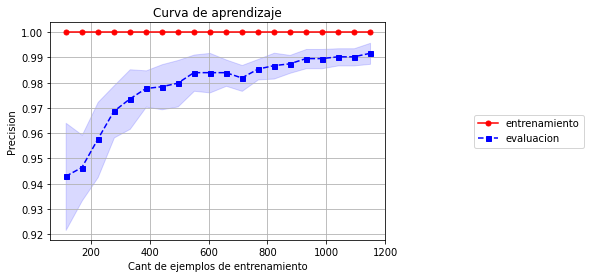

In [163]:
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel('Cant de ejemplos de entrenamiento')
plt.ylabel('Precision')
plt.show()

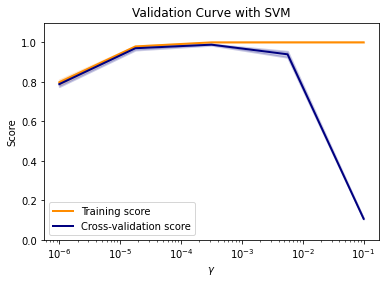

In [164]:
#curva de validación
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    svc_better, X_train, y_train, 
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

__Respuesta:__ Vemos que hasta un valor cercano a 0.0001 del parámetro gamma del modelo se tiene un score de cross validation bastante similar al del conjunto de entrenamiento, sin embargo, si gamma toma un valor mayor, ocurre overfitting dado el progresivo alejamiento entre ambas curvas.

In [45]:
#curva AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [67]:
# funcion para graficar curva roc
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(9,4))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [68]:
X_auc=X
y_auc=[]
for i in range(10):     #binarizar targets
    y_auc.append(np.array(pd.Series(y).apply(lambda x: 1 if x ==i else 0)))

In [69]:
# split dataset
X_auc_train, X_auc_test, y1_train, y1_test = train_test_split(X_auc, y_auc[0], test_size=0.3, random_state = 2)

# ajustar modelo 
svc_better.fit(X_auc_train,y1_train)

SVC(C=7, decision_function_shape='ovo', probability=True)

In [70]:
probs = svc_better.predict_proba(X_auc_test) # predecir probabilidades para X_test
probs_tp = probs[:, 1] # mantener solo las probabilidades de la clase positiva 
       
auc = roc_auc_score(y1_test, probs_tp)  # calcular score AUC 

print('AUC: %.2f' % auc)

AUC: 1.00


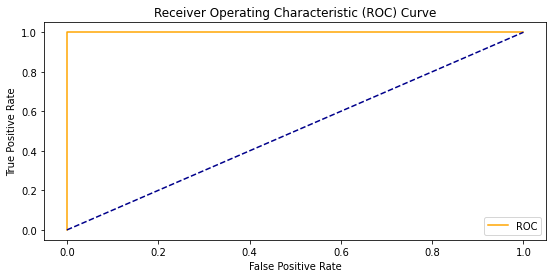

In [71]:
# calcular curva ROC
fpr, tpr, thresholds = roc_curve(y1_test, probs_tp) # obtener curva ROC
plot_roc_curve(fpr, tpr)

__Respuesta:__ Al ver la gráfica es clara la cercania a 1 del area bajo la curva ROC, lo cual respalda la efectividad del modelo escogido

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


## Selección de atributos

In [195]:
# Selección de atributos

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Separamos las columnas objetivo
x_training = digits.drop(['target',], axis=1)
y_training = digits['target']

# Aplicando el algoritmo univariante de prueba F.
k = 15  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

c:\users\shada\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\shada\miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [228]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]  #calculo de columnas de atributos
atributos

['c10',
 'c13',
 'c20',
 'c21',
 'c26',
 'c28',
 'c30',
 'c33',
 'c34',
 'c36',
 'c42',
 'c43',
 'c46',
 'c60',
 'c61']

## Extracción de atributos

In [234]:
#extracción de atributos (PCA)

from sklearn.preprocessing import StandardScaler

features = atributos

x = digits.loc[:, features].values
y = digits.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

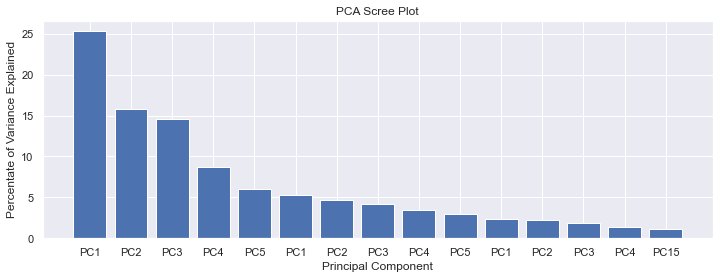

In [235]:
# ajustar modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC1', 'PC2', 'PC3', 'PC4','PC5','PC1', 'PC2', 'PC3', 'PC4','PC15']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,16), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

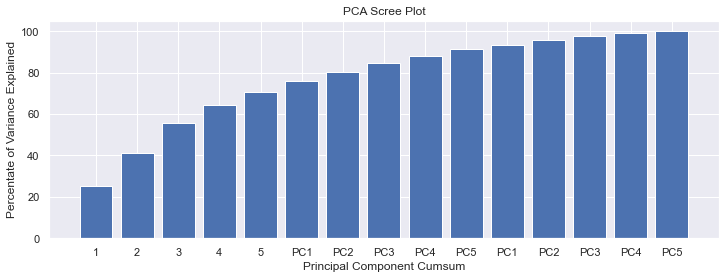

In [237]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['1', '2', '3','4', '5','PC1', 'PC2', 'PC3', 'PC4','PC5','PC1', 'PC2', 'PC3', 'PC4','PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,16), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

__Se puede notar que mas del 90% de la varianza es explicada por las 13 primeras componentes principales, que son las que se considerarán__

In [269]:
pca = PCA(n_components=13)

principalComponents = pca.fit_transform(x)  #Se escogen las primeras 13 componentes y se reduce la dimensionalidad de digits

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6', 'PC7', 'PC8','PC9','PC10', 'PC11', 'PC12','P13'])
targetDataframe = digits['target']

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,P13,target
0,1.656782,-0.821695,3.265488,0.232699,-0.583352,0.331024,0.307208,0.239251,0.288074,-0.494821,0.253079,-0.347441,0.371261,0
1,-1.274630,0.799657,-2.107633,-0.985458,1.581032,0.052721,-0.171286,-1.324903,0.927454,0.954132,0.816767,-0.272398,0.449276,1
2,-0.951969,1.013443,-1.081718,-2.710032,-1.014026,-0.838786,0.962243,-0.627615,0.086566,0.117104,-0.370594,0.514104,-0.955612,2
3,-1.745025,-1.442647,-1.148110,1.116979,0.423135,0.725316,0.239771,0.961669,-0.103438,-0.859044,0.068934,0.180807,0.574155,3
4,3.284421,0.390852,-0.457106,-0.875344,-0.357420,2.472391,1.067298,-0.930714,0.594433,-0.229924,-0.300016,-0.622262,0.185722,4


In [248]:
digits[atributos].shape

(1797, 15)

In [249]:
digits[:-1].shape

(1796, 65)

Dimensión del nuevo dataset:1797 filas, 15 columnas de datos

Dimensión del nuevo dataset: 1797 filas, 65 columnas de datos

In [250]:
digits[atributos].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c10     1797 non-null   int32
 1   c13     1797 non-null   int32
 2   c20     1797 non-null   int32
 3   c21     1797 non-null   int32
 4   c26     1797 non-null   int32
 5   c28     1797 non-null   int32
 6   c30     1797 non-null   int32
 7   c33     1797 non-null   int32
 8   c34     1797 non-null   int32
 9   c36     1797 non-null   int32
 10  c42     1797 non-null   int32
 11  c43     1797 non-null   int32
 12  c46     1797 non-null   int32
 13  c60     1797 non-null   int32
 14  c61     1797 non-null   int32
dtypes: int32(15)
memory usage: 105.4 KB


El nuevo conjunto de datos ocupa 105.4 KB de memoria, lo cual es menor a 456.4 KB que es lo que ocupa el dataset original

In [242]:
X_new = pca.fit_transform(digits[atributos])
y_new = digits['target']                     #conjunto de datos reduci

In [244]:
X_trainn, X_testn, y_trainn, y_testn = train_test_split(X_new, y_new, test_size=0.2, random_state = 42) #conjunto de datos de entrenamiento con nuevo conjunto de datos

In [252]:
t1=time()
svc_better.fit(X_trainn, y_trainn)
t2=time()

In [253]:
t3=time()
svc_better.fit(X_train,y_train)
t4=time()

In [257]:
print('tiempo nuevo conjunto de datos')
print(t2-t1)

tiempo nuevo conjunto de datos
0.355224609375


In [256]:
print('tiempo conjunto original')
print(t4-t3)

tiempo conjunto original
0.7982401847839355


In [258]:
t4-t3-t2+t1

0.44301557540893555

Vemos que el conjunto de datos mas reducido es 0.44301557540893555 [s] más rápido al ajustarse al modelo en estudio que el conjunto de datos originales

In [246]:
y_true =  list(y_testn)
y_pred = list(svc_better.predict(X_testn))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas svc:")
print("")
print(df_metrics)


Matriz de confusion:
 
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 26  1  0  1  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  2  0  0 43  0  1  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  1  0  0  0 32  0  1]
 [ 0  1  5  0  0  1  0  0 23  0]
 [ 0  0  0  0  0  1  0  1  0 38]]

Metricas svc:

   accuracy  recall  precision  fscore
0      0.95  0.9471     0.9519  0.9471


Finalmente, es posible ver que los valores de las métricas asociadas al modelo, con el conjunto de datos reducido, es cercano a los valores con los datos originales, lo cual es bastante interesante y da una buena alternativa de uso, ya que además existe un menor tiempo de ejecución, lo cual es una buena cualidad de la reducción de dimensionalidad.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [110]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

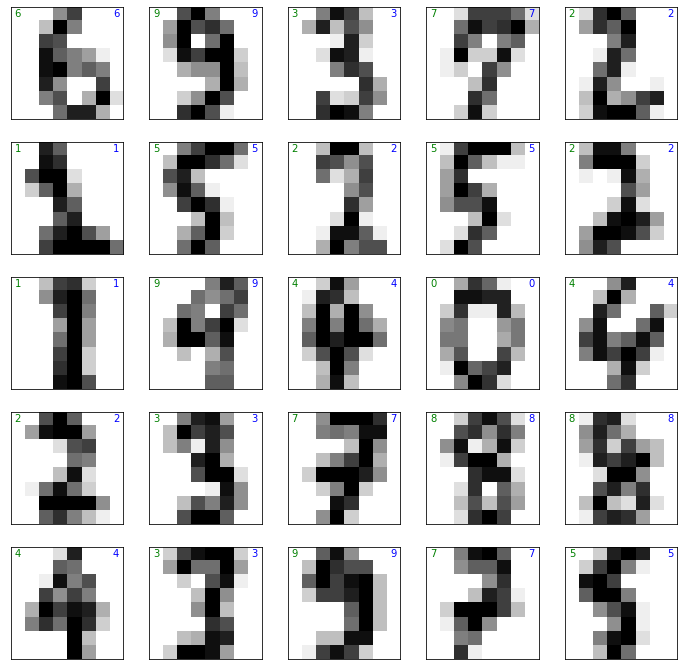

In [111]:
mostar_resultados(digits, svc_better,nx=5,ny=5,label='correctos')

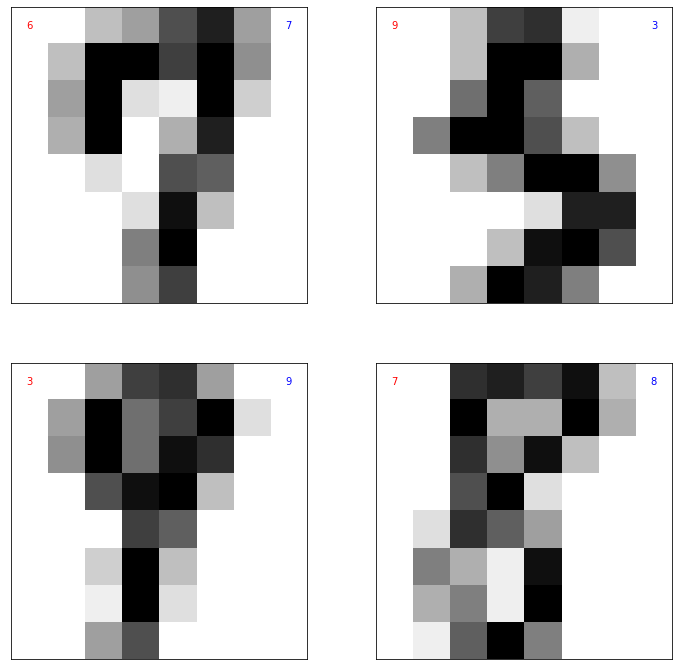

In [115]:
mostar_resultados(digits, svc_better,nx=2,ny=2,label='incorrectos')

__Respuesta:__ Las 5 fallas cometidas por la predicción ocurren por la similaridad de las imagenes reales con las predichas, dado que existe una gran cercanía visual, lo cual se ve traducido a la escala de grises en los datos, al momento de compararlas, y es posible que el modelo haya confundido dichos numeros por su parecido, como lo es el 3 con el 9, que dada la resolución de la imagen, es posible cierta confusión.  

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

__Respuesta:__ A partir de todo lo anterior estudiado vemos que el modelo SVC mejorado que se utilizó fue muy efectivo para el trabajo dado que predijo la gran mayoria de las imagenes, solo fallando en cinco, lo cual era esperable dados los buenos resultados de las distintos métodos que se le aplicaron para entender cuan seguro era el modelo (métricas, curva ROC, etc.). Así también, fue posible encontrar una buena alternativa al modelo original al reducir la dimensionalidad del conjunto de datos, lo cual obtuvo resultados cercanos al modelo sobre los datos originales. Finalmente, como trabajo futuro es posible considerar una mayor variedad de modelos, y más combinaciones de parámetros al realizar GridSearch al estimador, teniendo la posibilidad de hallar un mejor modelo con mejores resultados, haciendo aún más efectiva la predición.